In [23]:
from PythonCode.preprocess.preprocess import *

In [24]:
from PythonCode.models import *

In [25]:
import pandas as pd
import swifter
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import string
from typing import List
from nltk.corpus import stopwords
from itertools import islice
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
import os
import sys
from abc import ABC, abstractmethod

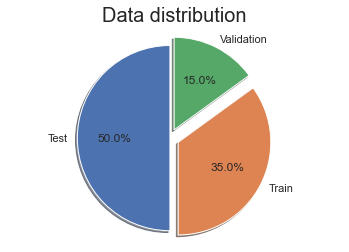

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
fig1, ax1 = plt.subplots()
ax1.pie([0.5,0.35,0.15], explode = [0,0.1, 0.1], labels=["Test", "Train", "Validation"], autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Data distribution",fontsize=20)
plt.show()

In [27]:
x_train, x_test, y_train, y_test = preprocess_pipeline("Data/C50train", 2, bag_of_words, normalize =False,
                        save_path="./Data/clean/")

In [28]:
x_train

,00,000,0003,002,01,02,032,05,052,07,...,zagreb,zagrebacka,zeman,zemska,zeros,zieleniec,zivnostenska,zombies,zone,zubizarreta
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,5,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,1,0,1,0,0,0,1,...,3,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
66,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
67,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
68,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
x_test.shape

(30, 4536)

# Simple Model 

## KNN  

C:\Users\eviat\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


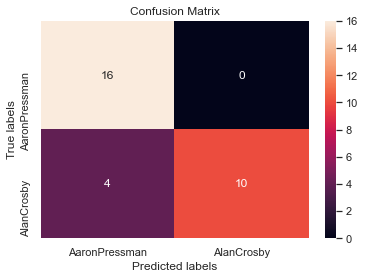

<Figure size 720x504 with 0 Axes>

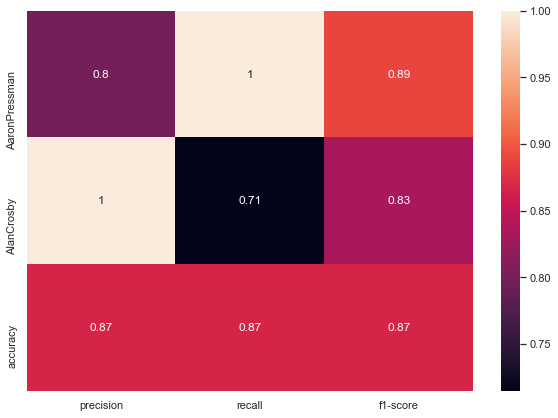

In [30]:
from sklearn.neighbors import KNeighborsClassifier
class KNN(Model):
    def train(self, x_train, y_train,**kwargs):
        self.mnb = KNeighborsClassifier(n_neighbors=10, weights= 'distance', p=2)
        self.mnb.fit(x_train, y_train)
        return self.mnb
    def predict(self,x_test):
        return self.mnb.predict(x_test)
KNN().pipeline(x_train, y_train, x_test.values, y_test,"simple KNN",do_cross_validation=False)
# KNN().pipeline(x_train, y_train, x_test.values, y_test,"simple KNN",do_cross_validation=False)

## Naive Bayes

C:\Users\eviat\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(


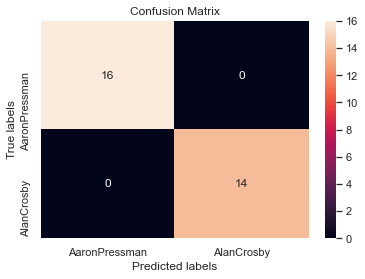

<Figure size 720x504 with 0 Axes>

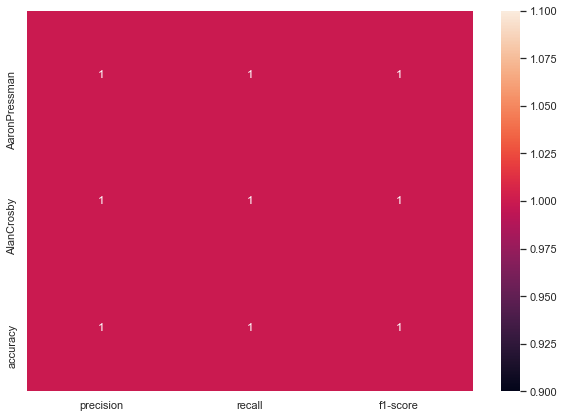

In [31]:
from sklearn.naive_bayes import MultinomialNB
class Naive_Bayes(Model):
    def train(self, x_train, y_train,**kwargs):
        self.mnb = MultinomialNB()
        self.mnb.fit(x_train, y_train)
        return self.mnb
    def predict(self,x_test):
        return self.mnb.predict(x_test)
Naive_Bayes().pipeline(x_train, y_train, x_test.values, y_test,"simple Naive Bayes 2 Authors",do_cross_validation=False)

# Feartue selection

In [32]:
from sklearn.feature_selection import VarianceThreshold
column_names = x_train.columns 
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
sel.fit_transform(x_train)
x_train = sel.transform(x_train)
x_test = x_test.drop([feature for feature in column_names if feature not in sel.get_feature_names_out()],axis=1)

In [33]:
x_test.shape 

(30, 706)

In [34]:
sel.get_feature_names_out()

array(['000', '0003', '10', '11', '12', '13', '14', '15', '150', '18',
       '1974', '1994', '1995', '1996', '20', '23', '25', '26', '28', '29',
       '31', '40', '41', '42', '639', '68', '70', '85', 'about', 'access',
       'according', 'act', 'action', 'activities', 'added', 'address',
       'addresses', 'administration', 'after', 'against', 'agency',
       'agents', 'ahead', 'all', 'alliance', 'allow', 'allowed',
       'allowing', 'already', 'also', 'although', 'amato', 'amendment',
       'america', 'among', 'amp', 'an', 'analyst', 'analysts', 'and',
       'another', 'any', 'approach', 'april', 'are', 'argued', 'as',
       'association', 'at', 'august', 'authority', 'available', 'back',
       'bank', 'banka', 'bankers', 'banking', 'banks', 'based', 'battle',
       'be', 'because', 'becker', 'been', 'before', 'berger', 'between',
       'big', 'bill', 'billion', 'bills', 'bit', 'board', 'body', 'bond',
       'boost', 'boris', 'both', 'bourse', 'bratislava', 'break',
     

## Naive Bayes 

C:\Users\eviat\anaconda3\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but MultinomialNB was fitted without feature names
  warnings.warn(


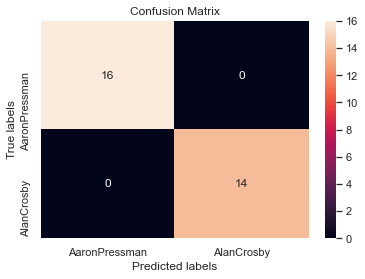

<Figure size 720x504 with 0 Axes>

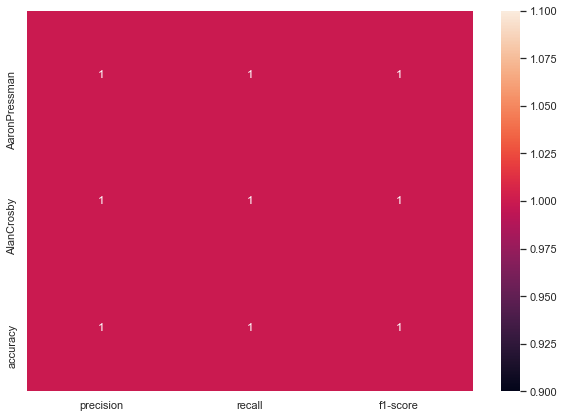

In [35]:
from sklearn.naive_bayes import MultinomialNB
class Naive_Bayes(Model):
    def train(self, x_train, y_train,**kwargs):
        self.mnb = MultinomialNB()
        self.mnb.fit(x_train, y_train)
        return self.mnb
    def predict(self,x_test):
        return self.mnb.predict(x_test)
# Naive_Bayes().pipeline(x_train, y_train, x_validation.values, y_validation,"simple Naive Bayes 2 Authors",do_cross_validation=False)
Naive_Bayes().pipeline(x_train, y_train, x_test, y_test,"simple Naive Bayes 2 Authors",do_cross_validation=False)

## KNN

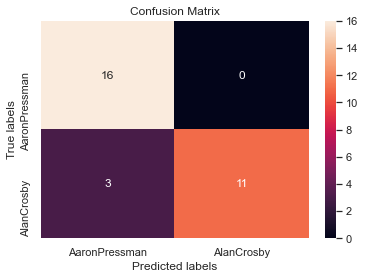

<Figure size 720x504 with 0 Axes>

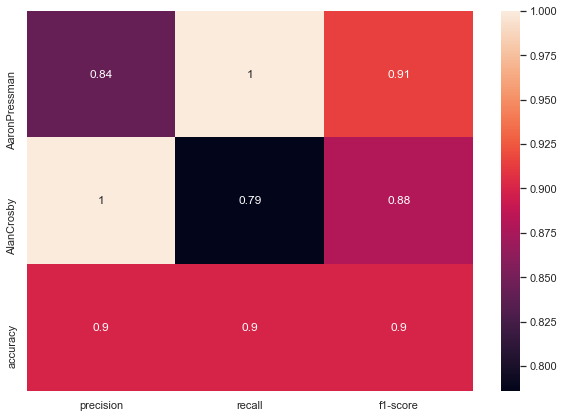

In [36]:
from sklearn.neighbors import KNeighborsClassifier
class KNN(Model):
    def train(self, x_train, y_train,**kwargs):
        self.mnb = KNeighborsClassifier(n_neighbors=4, weights= 'distance', p=2)
        self.mnb.fit(x_train, y_train)
        return self.mnb
    def predict(self,x_test):
        return self.mnb.predict(x_test)
KNN().pipeline(x_train, y_train, x_test.values, y_test,"simple KNN",do_cross_validation=False)

## Logistic Regression 

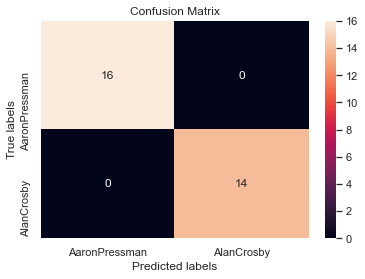

<Figure size 720x504 with 0 Axes>

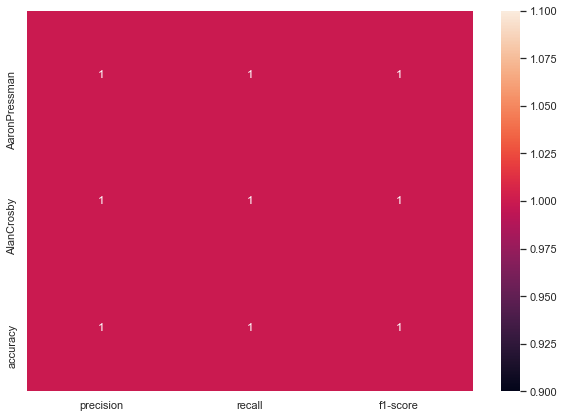

In [38]:
from sklearn.linear_model import SGDClassifier
class LogisticRegression(Model):
    def train(self, x_train, y_train,**kwargs):
        self.mnb = SGDClassifier(loss='log')
        self.mnb.fit(x_train, y_train)
        return self.mnb
    def predict(self,x_test):
        return self.mnb.predict(x_test)
LogisticRegression().pipeline(x_train, y_train, x_test.values, y_test.values,"LogisticRegression 2 Authors 1.1",do_cross_validation=False)

### pretty classification report 

In [184]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report
mnb = SGDClassifier(loss='log')
mnb.fit(x_train, y_train)
pred = mnb.predict(x_test.values)
ss = classification_report(pred, y_test,output_dict=True)
print(ss)

{'0': {'precision': 0.98, 'recall': 0.98, 'f1-score': 0.98, 'support': 50}, '1': {'precision': 0.98, 'recall': 0.98, 'f1-score': 0.98, 'support': 50}, 'accuracy': 0.98, 'macro avg': {'precision': 0.98, 'recall': 0.98, 'f1-score': 0.98, 'support': 100}, 'weighted avg': {'precision': 0.98, 'recall': 0.98, 'f1-score': 0.98, 'support': 100}}


0.98

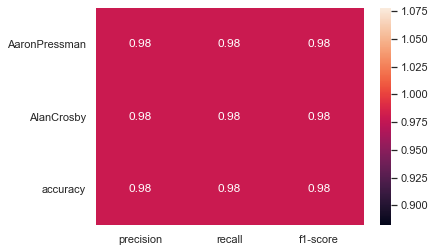

In [199]:
import seaborn as sns 
clf_report = classification_report(y_test, pred,target_names= ["AaronPressman","AlanCrosby"],output_dict=True)
sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :-2].T, annot=True)
clf_report['accuracy']